In [5]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [6]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [7]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [99]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [100]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)


In [101]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [102]:
# Save references to each table
measurement = Base.classes.measurement
stations = Base.classes.station

In [103]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [29]:
# Find the most recent date in the data set.
last_date=session.query(func.max(measurement.date)).scalar()
last_date

'2017-08-23'

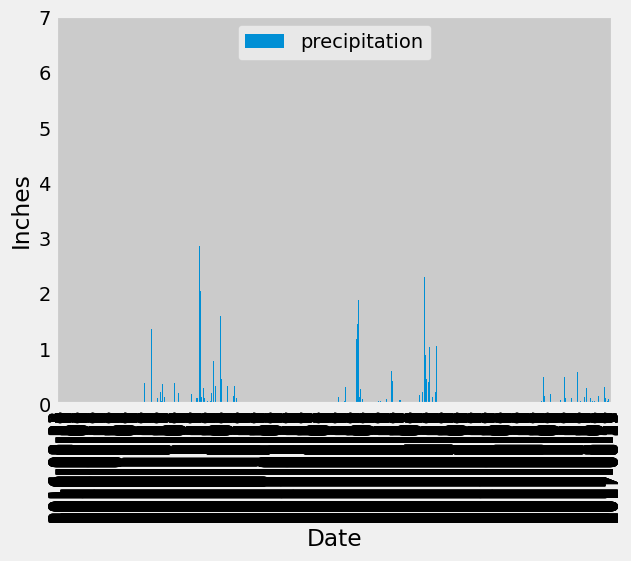

In [55]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_yr_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
one_yr_date

# Perform a query to retrieve the data and precipitation scores
results = session.query(measurement.station,measurement.date,measurement.prcp,measurement.tobs ).\
    filter(measurement.date <= last_date).filter(measurement.date >= one_yr_date).all()

# List comprehension solution to format the results
prcp_rows = [{"station": result[0], "date": result[1], "precipitation": result[2]} for result in results]
prcp_rows

# Save the query results as a Pandas DataFrame. Explicitly set the column names
results_pd = pd.DataFrame(prcp_rows)
results_pd.head()

# Sort the dataframe by date
clean_pd=results_pd.sort_values(by='date',ascending=True)
clean_pd.head()

# Use Pandas Plotting with Matplotlib to plot the data
df = pd.DataFrame(clean_pd, columns=['date','precipitation'])
df.set_index('date', inplace=True)
df.plot.bar()

plt.xlabel('Date')
plt.ylabel('Inches')

# Adjust the layout for better visualization

# Show the plot
plt.show()

In [54]:
# Use Pandas to calculate the summary statistics for the precipitation data
clean_pd.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [59]:
# Design a query to calculate the total number of stations in the dataset
station_qry=session.query(stations.results).count()
station_qry

9

In [78]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
station_counts = session.query(measurement.station, func.count().label('count')).\
    group_by(measurement.station).\
    order_by(func.count().desc()).all()
# List the stations and their counts in descending order.
station_counts

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [83]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_data = session.query(
    func.min(measurement.tobs).label("min_temp"),
    func.max(measurement.tobs).label("max_temp"),
    func.avg(measurement.tobs).label("avg_temp")
).filter(measurement.station == 'USC00519281').all()

station_data

[(54.0, 85.0, 71.66378066378067)]

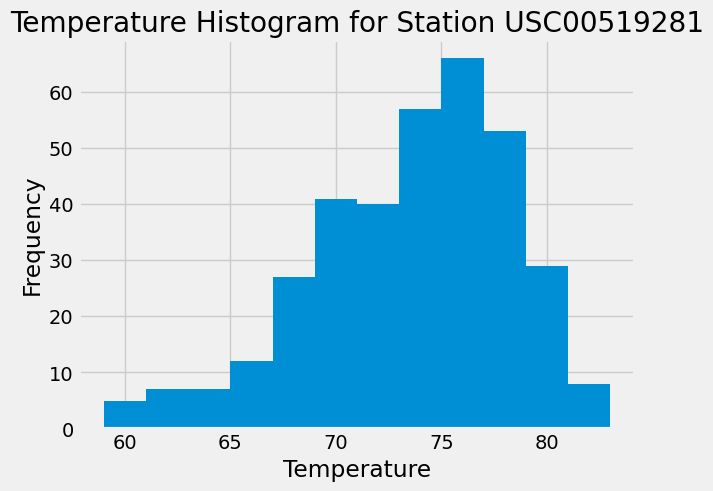

In [98]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_station = session.query(measurement.tobs).filter(measurement.station == 'USC00519281').\
    filter(measurement.date <= last_date).filter(measurement.date >= one_yr_date).all()

temperatures = [temp[0] for temp in active_station]

temp_results = pd.DataFrame({"Temperature":temperatures})

plt.hist(temp_results['Temperature'], bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Histogram for Station USC00519281')
plt.show()

# Close Session

In [16]:
# Close Session
session.close()